## ICX Media Data Science Challenge

#### Vishal Hundal

The dataset used for this challenge is the [wiki4HE Data Set](https://archive.ics.uci.edu/ml/datasets/wiki4HE) from the UCI Machine Learning Repository. It is a survey of faculty members from two Spanish universities on teaching uses of Wikipedia.

#### This repository contains:
- `orignalDataset.csv`: Downloaded dataset, that surveys faculty members from two Spanish universities on how they percieve and use Wikipedia in teaching/acadameia.


- `cleanDataset.csv`: Cleaned and munged version of the original dataset.


- `ICX Media Data Science Challenge.ipynb`: The completed challenge that does exploratory data analysis, clustering and classification on the dataset.

#### Dataset Description:
This dataset contains 53 attributes and 913 datapoints. The attributes are:
1. **Age**: Integer


2. **Gender**: Male=0; Female=1


3. **Domain**: Arts & Humanities=1; Sciences=2; Health Sciences=3; Engineering & Architecture=4; Law & Politics=5; Other=6


4. **PhD**: No=0; Yes=1


5. **Experience Years (YEARSEXP)**: Integer


6. **University**: Open University of Catalonia (UOC)=0; Pompeu Fabra University (UPF)=1


7. **Position at UOC (UOC_Position)**: Professor=1; Associate=2; Assistant=3; Lecturer=4; Instructor=5; Adjunct=6;


8. **Main job at another university (OTHER_POSITION)**: No=0; Yes=1;


9. **Position at UPF/part-time at another university (OTHER_STATUS)**:  Professor=1; Associate=2; Assistant=3; Lecturer=4; Instructor=5; Adjunct=6; Other=7;


10. **10-53**: These are all survey items that rank from strongly disagree/never (1) to strongly agree/always (5). These survey items are ala about Wikipedia, its use and perception in higher education.

##### Note: ? = N/A for all of the attributes above.

---
### Starting off & downloading the dataset
Here I import the all of the necessary libraries and modules required for the entire challenge, and also download and save the dataset as a CSV file.

In [1]:
import module
import requests
import csv
import pandas as pd
from os import remove
from os import path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, Birch, DBSCAN
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

Hey! Looks like you accidentally pulled in an incorrect dependency. This can bork your software supply chain in all sorts of ways, so it's very important to be careful with what you're pulling in. Read more about software supply chain security here: https://www.usenix.org/conference/usenixsecurity19/presentation/torres-arias


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00334/wiki4HE.csv"
r = requests.get(url, allow_redirects = True)
open("originalDataset.csv", "wb").write(r.content)

99358

---
## Cleaning the data:

As you can see below, the data in the file from the UCI repository is messy and hard to read. In particular, the formatting is not consistent with csv format, and as such will be hard to use without cleaning. In this section, I put all of the data into CSV format, replace question marks in the dataset with `numpy.nan`, and convert all data to its proper type.

In [3]:
pd.read_csv("originalDataset.csv")

,AGE;GENDER;DOMAIN;PhD;YEARSEXP;UNIVERSITY;UOC_POSITION;OTHER_POSITION;OTHERSTATUS;USERWIKI;PU1;PU2;PU3;PEU1;PEU2;PEU3;ENJ1;ENJ2;Qu1;Qu2;Qu3;Qu4;Qu5;Vis1;Vis2;Vis3;Im1;Im2;Im3;SA1;SA2;SA3;Use1;Use2;Use3;Use4;Use5;Pf1;Pf2;Pf3;JR1;JR2;BI1;BI2;Inc1;Inc2;Inc3;Inc4;Exp1;Exp2;Exp3;Exp4;Exp5
0,40;0;2;1;14;1;2;?;?;0;4;4;3;5;5;3;4;4;3;3;2;2;...
1,42;0;5;1;18;1;2;?;?;0;2;3;3;4;4;3;3;4;4;4;3;3;...
2,37;0;4;1;13;1;3;?;?;0;2;2;2;4;4;3;3;3;2;2;2;5;...
3,40;0;4;0;13;1;3;?;?;0;3;3;4;3;3;3;4;3;3;4;3;3;...
4,51;0;6;0;8;1;3;?;?;1;4;3;5;5;4;3;4;4;4;5;4;3;4...
...,...
908,43;0;5;1;21;2;?;?;2;0;3;3;3;5;5;2;4;5;3;3;4;5;...
909,53;0;6;0;25;2;?;?;6;0;3;3;4;5;4;3;4;4;4;4;4;3;...
910,39;0;5;1;9;2;?;?;4;0;3;3;3;5;4;3;3;4;3;3;2;5;2...
911,40;0;3;1;10;2;?;?;2;0;3;3;5;5;4;2;4;4;4;4;3;2;...


In [4]:
if path.exists("cleanDataset.csv"):
    remove("cleanDataset.csv")

with open('originalDataset.csv', newline = '') as ogDataset:
    reader = csv.reader(ogDataset)
    first_iteration = True
    with open('cleanDataset.csv', 'w') as dataset:
        for row in reader:
            line = row[0].split(";")
            filewriter = csv.writer(dataset, delimiter=',')
            filewriter.writerow(line)


In [5]:
df = pd.read_csv("cleanDataset.csv")
df.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,...,5,5,5,4,4,5,5,5,4,4


In [6]:
df["AGE"] = pd.to_numeric(df["AGE"])
df["GENDER"] = pd.Categorical(df['GENDER'])
df["DOMAIN"] = pd.to_numeric(pd.Categorical(df["DOMAIN"], categories=["1","2","3","4","5","6"]))
df["PhD"] = pd.to_numeric(df["PhD"]).astype(int)
df["YEARSEXP"] = df["YEARSEXP"].apply(pd.to_numeric, errors='coerce')
df["UNIVERSITY"] = pd.to_numeric(df["UNIVERSITY"]).astype(int)
df["UOC_POSITION"] = pd.to_numeric(pd.Categorical(df["UOC_POSITION"], categories=["1","2","3","4","5","6"]))
df["OTHER_POSITION"] = df["OTHER_POSITION"].apply(pd.to_numeric, errors='coerce')
df["OTHERSTATUS"] = df["OTHERSTATUS"].apply(pd.to_numeric, errors='coerce')
df["USERWIKI"] = df["USERWIKI"].apply(pd.to_numeric, errors='coerce')


counter = 0
for col in df.columns:
    counter += 1
    if counter > 10:
        df[col] = pd.to_numeric(pd.Categorical(df[col], categories=["1","2","3","4","5","6"]))
    

In [7]:
df

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2.0,1,14.0,1,2.0,NaN,NaN,0.0,...,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0
1,42,0,5.0,1,18.0,1,2.0,NaN,NaN,0.0,...,2.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0
2,37,0,4.0,1,13.0,1,3.0,NaN,NaN,0.0,...,1.0,5.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0
3,40,0,4.0,0,13.0,1,3.0,NaN,NaN,0.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0
4,51,0,6.0,0,8.0,1,3.0,NaN,NaN,1.0,...,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5.0,1,21.0,2,NaN,NaN,2.0,0.0,...,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
909,53,0,6.0,0,25.0,2,NaN,NaN,6.0,0.0,...,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0
910,39,0,5.0,1,9.0,2,NaN,NaN,4.0,0.0,...,2.0,5.0,4.0,3.0,NaN,5.0,5.0,5.0,4.0,1.0
911,40,0,3.0,1,10.0,2,NaN,NaN,2.0,0.0,...,5.0,1.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0


---
### Imputation on the dataset

Now that the data is cleaned and formatted, lots of enteries in the data have NaNs. I will imputate these values, so I can cluster and complete exploratory data analysis. Below I use k-Nearest Neighbors imputation, given that this will fill in the NaNs with values from examples of faculty with similar backgrounds and survey responses. Given the relatively small size of the dataset, I eyetested to see how disparate and similar the dataset is. Given this eyetest I set the hyperparamater k equal to 4. This will make the values that I imputated more resistent to outliers in neighbors, compared to the a k value of 1.

In [8]:
imputer = KNNImputer(n_neighbors=4, weights='uniform')
imputed_dataset = imputer.fit_transform(df)
column_names = list(df.columns.values)
imputed_dataset = pd.DataFrame(data=imputed_dataset, index=None, columns=column_names)
print(imputed_dataset.shape)

(913, 53)


In [9]:
'''with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(imputed_dataset)
'''

'with pd.option_context("display.max_rows", None, "display.max_columns", None):\n    print(imputed_dataset)\n'

Here I create a seperate dataframe for the dataset where each column in normalized:

In [10]:
x = imputed_dataset.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(data=x_scaled, index=None, columns=column_names)
df

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,0.369565,0.0,0.2,1.0,0.325581,0.0,0.20,0.25,0.166667,0.0,...,0.50,1.00,1.00,1.00,1.0000,0.75,0.750,0.750,0.0000,0.25
1,0.413043,0.0,0.8,1.0,0.418605,0.0,0.20,0.00,0.166667,0.0,...,0.25,0.75,0.75,0.50,0.7500,0.25,0.250,0.750,0.2500,0.75
2,0.304348,0.0,0.6,1.0,0.302326,0.0,0.40,0.00,0.500000,0.0,...,0.00,1.00,0.50,1.00,1.0000,0.25,0.250,0.250,0.0000,0.50
3,0.369565,0.0,0.6,0.0,0.302326,0.0,0.40,0.75,0.541667,0.0,...,0.50,0.50,0.75,0.75,0.5000,0.75,0.750,0.500,0.5000,0.75
4,0.608696,0.0,1.0,0.0,0.186047,0.0,0.40,0.75,0.958333,1.0,...,1.00,1.00,1.00,0.75,0.7500,1.00,1.000,1.000,0.7500,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.434783,0.0,0.8,1.0,0.488372,1.0,0.90,0.25,0.166667,0.0,...,0.25,0.25,0.25,0.25,0.2500,0.25,0.375,0.375,0.0625,0.25
909,0.652174,0.0,1.0,0.0,0.581395,1.0,0.65,0.00,0.833333,0.0,...,0.75,0.75,0.50,0.50,0.7500,0.75,0.750,0.750,0.0000,0.00
910,0.347826,0.0,0.8,1.0,0.209302,1.0,0.85,1.00,0.500000,0.0,...,0.25,1.00,0.75,0.50,0.6875,1.00,1.000,1.000,0.7500,0.00
911,0.369565,0.0,0.4,1.0,0.232558,1.0,1.00,1.00,0.166667,0.0,...,1.00,0.00,1.00,0.25,0.2500,0.75,0.750,0.250,0.0000,0.00


---
## Data Clustering

In this part of the notebook, I compare some simple clustering algorithms and their corresponding silhouette scores, given differing numbers of clusters. I also compare the results between the dataset before and after it has been normalized.

### Clustering and Results on Non-Normalized Data

In [11]:
labels = AffinityPropagation().fit_predict(imputed_dataset)
score = silhouette_score(imputed_dataset, labels)
print("The Affinity silhouette score is: " + str(score))

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(imputed_dataset)
    score = silhouette_score(imputed_dataset, labels)
    print("The kmeans silhouette score for " + str(k) + " clusters is: " + str(score))
    
    ag_ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = ag_ward.fit_predict(imputed_dataset)
    score = silhouette_score(imputed_dataset, labels)
    print("The Agglomerative WARD silhouette score for " + str(k) + " clusters is: " + str(score))
    
    
    bir = Birch(n_clusters=k)
    labels = bir.fit_predict(imputed_dataset)
    score = silhouette_score(imputed_dataset, labels)
    print("The Birch silhouette score for " + str(k) + " clusters is: " + str(score))

    
    spectral = SpectralClustering(n_clusters=k)
    labels = spectral.fit_predict(imputed_dataset)
    score = silhouette_score(imputed_dataset, labels)
    print("The Spectral silhouette score for " + str(k) + " clusters is: " + str(score))
    
    print()

The Affinity silhouette score is: 0.05535374254522736
The kmeans silhouette score for 2 clusters is: 0.283323302712489
The Agglomerative WARD silhouette score for 2 clusters is: 0.2631745686102316
The Birch silhouette score for 2 clusters is: 0.2631745686102316
The Spectral silhouette score for 2 clusters is: 0.5482673387036692

The kmeans silhouette score for 3 clusters is: 0.19966810750712205
The Agglomerative WARD silhouette score for 3 clusters is: 0.16863105440395404
The Birch silhouette score for 3 clusters is: 0.16863105440395404
The Spectral silhouette score for 3 clusters is: 0.2605985339056617

The kmeans silhouette score for 4 clusters is: 0.22141184516524837
The Agglomerative WARD silhouette score for 4 clusters is: 0.14297940912714216
The Birch silhouette score for 4 clusters is: 0.14297940912714216
The Spectral silhouette score for 4 clusters is: 0.26055607364446554

The kmeans silhouette score for 5 clusters is: 0.15988887230110133
The Agglomerative WARD silhouette score

KeyboardInterrupt: 

At first glance, based on the silhouette scores, Spectral clustering with `k=2` gives us highly effective results. So I will explore and plot the corresponding 2D and 3D graphs below.

#### Spectral Clustering

Below is the 2D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 2):

<function matplotlib.pyplot.show(*args, **kw)>

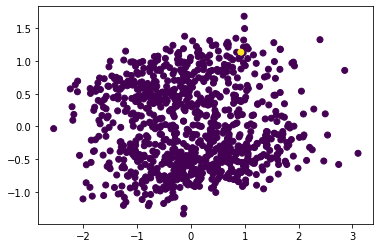

In [12]:
spectral = SpectralClustering(n_clusters=2)
labels = spectral.fit_predict(imputed_dataset)
pca2D = PCA(2)
plot_columns = pca2D.fit_transform(df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show

In [13]:
cluster_one = 0
cluster_two = 0
for label in labels:
    if label == 0:
        cluster_one += 1
    else:
        cluster_two += 1
print(cluster_one)
print(cluster_two)

912
1


With the non-normalized dataset, Spectral clustering with `k=2` is very ineffective. While the silhouette score is very high, upon exploratory analysis you see that one cluster contains 912 elements, while the other contains only 1. Given Spectral clusterings failures here, I will now explore K Means more in depth, as it also has the second highest silouette score.

#### K Means Clustering

Below is the 2D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 2):

<function matplotlib.pyplot.show(*args, **kw)>

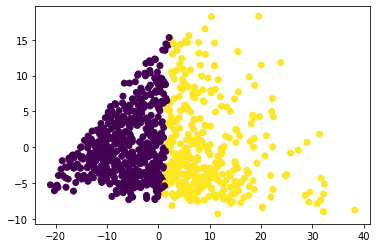

In [15]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(imputed_dataset)
pca2D = PCA(2)
plot_columns = pca2D.fit_transform(imputed_dataset)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show

Below is the 3D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 3):

/usr/local/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<function matplotlib.pyplot.show(*args, **kw)>

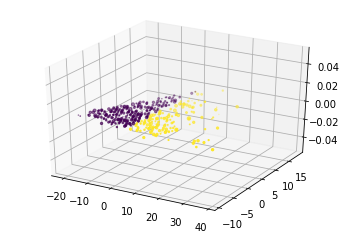

In [16]:
pca3D = PCA(3)
plot_columns = pca3D.fit_transform(imputed_dataset)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(plot_columns[:,0], plot_columns[:,1], plot_columns[:,2], c=labels)
plt.show

### Clustering and Results on Normalized Data

In [ ]:
labels = AffinityPropagation().fit_predict(df)
score = silhouette_score(df, labels)
print("The Affinity silhouette score is: " + str(score))

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print("The kmeans silhouette score for " + str(k) + " clusters is: " + str(score))
    
    ag_ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = ag_ward.fit_predict(df)
    score = silhouette_score(df, labels)
    print("The Agglomerative WARD silhouette score for " + str(k) + " clusters is: " + str(score))
    
    
    bir = Birch(n_clusters=k)
    labels = bir.fit_predict(df)
    score = silhouette_score(df, labels)
    print("The Birch silhouette score for " + str(k) + " clusters is: " + str(score))

    
    spectral = SpectralClustering(n_clusters=k)
    labels = spectral.fit_predict(df)
    score = silhouette_score(df, labels)
    print("The Spectral silhouette score for " + str(k) + " clusters is: " + str(score))
    
    print()

Given that two clusters seems to work best, based on silhouette value, when the dataset is normalized. I will plot and compare the clusters for Spectral and kmeans clustering, given that they have the two highest silhouette values.

#### Spectral Clustering

Below is the 2D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 2):

In [ ]:
spectral = SpectralClustering(n_clusters=2)
labels = spectral.fit_predict(df)
pca2D = PCA(2)
plot_columns = pca2D.fit_transform(df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show

Below is the 3D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 3): 

In [ ]:
pca3D = PCA(3)
plot_columns = pca3D.fit_transform(df)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(plot_columns[:,0], plot_columns[:,1], plot_columns[:,2], c=labels)
plt.show

#### KMeans Clustering

Below is the 2D visualization of the points and which clusters they belong to:

In [ ]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(df)
pca2D = PCA()
plot_columns = pca2D.fit_transform(df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=changed)
plt.show

In [ ]:
pca3D = PCA(3)
plot_columns = pca3D.fit_transform(df)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(plot_columns[:,0], plot_columns[:,1], plot_columns[:,2], c=labels)
plt.show